In [120]:
import numpy as np
import matplotlib.pyplot as plt

In [121]:
E = 210e9
A = 0.05**2
h_1 = 0.5
h_2 = 0.5

In [122]:
K_el = lambda h: E*A/h * np.matrix([[1,-1],[-1,1]])

In [123]:
K_ref = np.zeros((3,3))
K_ref[0:2,0:2] += K_el(h_1)
K_ref[1:3,1:3] += K_el(h_2)
K_ref

array([[ 1.05e+09, -1.05e+09,  0.00e+00],
       [-1.05e+09,  2.10e+09, -1.05e+09],
       [ 0.00e+00, -1.05e+09,  1.05e+09]])

In [124]:
RHS_ref = np.zeros(3)
RHS_ref[-1] = 1e6
RHS_ref

array([      0.,       0., 1000000.])

In [125]:
K_ref[0,:] = 0
K_ref[0,0] = 1
RHS_ref[0] = 0
np.linalg.eigvals(K_ref)

array([4.01064312e+08, 2.74893569e+09, 1.00000000e+00])

[-2.82762768e-21  9.52380952e-04  1.90476190e-03]


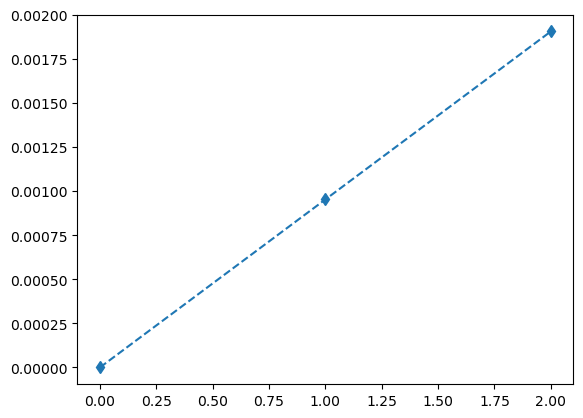

In [126]:
u = np.linalg.solve(K_ref,RHS_ref)
print(u)
plt.plot(u,marker='d',ls='--')

In [127]:
K_sys = np.block([[K_el(h_1),np.zeros_like(K_el(h_1))],[np.zeros_like(K_el(h_1)),K_el(h_2)]])
K_sys

matrix([[ 1.05e+09, -1.05e+09,  0.00e+00,  0.00e+00],
        [-1.05e+09,  1.05e+09,  0.00e+00,  0.00e+00],
        [ 0.00e+00,  0.00e+00,  1.05e+09, -1.05e+09],
        [ 0.00e+00,  0.00e+00, -1.05e+09,  1.05e+09]])

In [128]:
RHS_sys = np.zeros(4)
RHS_sys[-1] = 1e6
RHS_sys

array([      0.,       0.,       0., 1000000.])

In [129]:
K_sys[0,:] = 0
K_sys[0,0] = 1
RHS_sys[0] = 0
K_sys

matrix([[ 1.00e+00,  0.00e+00,  0.00e+00,  0.00e+00],
        [-1.05e+09,  1.05e+09,  0.00e+00,  0.00e+00],
        [ 0.00e+00,  0.00e+00,  1.05e+09, -1.05e+09],
        [ 0.00e+00,  0.00e+00, -1.05e+09,  1.05e+09]])

In [135]:
k_spring = 1e8
C = np.array([[0,1,-1,0]])*k_spring
C

array([[ 0.e+00,  1.e+08, -1.e+08,  0.e+00]])

In [136]:
K_lagr = np.zeros((5,5))
K_lagr[0:4,0:4] += K_sys
K_lagr[4:5,0:4] += C
K_lagr[0:4,4:5] += C.T
K_lagr
np.linalg.eigvals(K_lagr)

array([-7.65181397e+07,  6.46881782e+07,  1.05943820e+09,  2.10239176e+09,
        1.00000000e+00])

In [137]:
RHS_lagr = np.append(RHS_sys,-1e-4*k_spring)
RHS_lagr

array([      0.,       0.,       0., 1000000.,  -10000.])

In [138]:
u_lagr=np.linalg.solve(K_lagr,RHS_lagr)
u_lagr

array([ 2.15426621e-19,  9.52380952e-04,  1.05238095e-03,  2.00476190e-03,
       -1.00000000e-02])

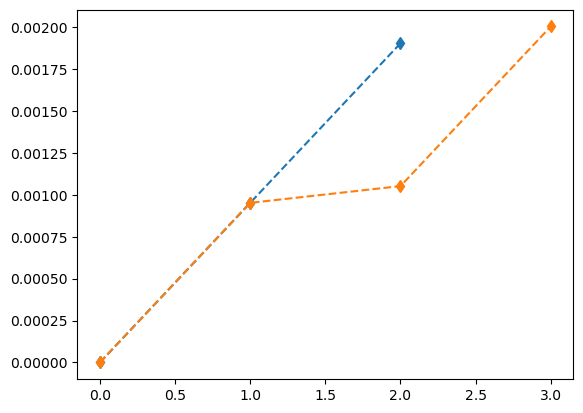

In [139]:
plt.plot(u,marker='d',ls='--')
plt.plot(u_lagr[0:-1],marker='d',ls='--')